# Libraries

In [108]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

In [109]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.expand_frame_repr', False) ## works in pycharm
pd.set_option('max_colwidth', -1)

C:\Users\magni\AppData\Local\Temp/ipykernel_1164/2392340952.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [110]:
def multiple_hist(df):
    import math
    # collect variable names
    vnames = df.columns
    vcount = len(vnames)

    # determine required rows and columns for visualizations
    column_count = 3 
    row_count = math.ceil(vcount / column_count)

    # configure figure layout
    fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 8, row_count * 5))

    # visualize distribution of each variable
    for k in range(0, vcount):

        # determine row & col position
        col = k % column_count
        row = int(k / column_count)

        # set figure at row & col position
        ax[row][col].hist(df[vnames[k]], rwidth=0.95, bins=100) # histogram
        #ax[row][col].set_xlim(-1,1) # uncomment if you want to set the xscale to a fixed range
        ax[row][col].set_ylim(0,df.shape[0]) # set y 
        ax[row][col].text(x=0.1, y=df.shape[0]-100, s=vnames[k], fontsize=20, ha='left', va='top') 

In [111]:
def df_scatter_plots(df, y_col, hue_col=None):
    import math
    # collect variable names
    vnames = df.columns
    vcount = len(vnames)

    # determine required rows and columns for visualizations
    column_count = 3 
    row_count = math.ceil(vcount / column_count)

    # configure figure layout
    fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 8, row_count * 5))

    # visualize distribution of each variable
    for k in range(0, vcount):

        # determine row & col position
        col = k % column_count
        row = int(k / column_count)

        # set figure at row & col position
        if hue_col is None:
            ax[row][col].scatter(x = df[vnames[k]], y=df[y_col])
        else:
            scatter = ax[row][col].scatter(x = df[vnames[k]], y=df[y_col], c=df[hue_col], label=vnames[k])
            # produce a legend with the unique colors from the scatter
            legend = ax[row][col].legend(*scatter.legend_elements(), loc="upper right", title='{}'.format(hue_col))
            ax[row][col].add_artist(legend)
        ax[row][col].set_ylim(0,df.shape[0]) # set y 
        ax[row][col].title.set_text('{} vs {}'.format(y_col, vnames[k]))

In [112]:
def corr_matrix(df):
    f = plt.figure(figsize=(10, 10))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.title('Correlation Matrix', fontsize=16);

In [113]:
def drop_constant_column(df):
    """
    Drops constant value columns of pandas dataframe.
    """
    return df.loc[:, (df != df.iloc[0]).any()]

In [330]:
import numpy as np
import matplotlib.pyplot as plt

def multiple_hist_hue(df):
    import math
    # collect variable names
    vnames = df.columns
    vcount = len(vnames)

    # determine required rows and columns for visualizations
    column_count = 3 
    row_count = math.ceil(vcount / column_count)

    # configure figure layout
    fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 8, row_count * 5))

    # visualize distribution of each variable
    for k in range(0, vcount):
        # determine row & col position
        col = k % column_count
        row = int(k / column_count)
        sns.histplot(data=df, x=df[vnames[k]], hue=df['phishing'], discrete=True,
                     edgecolor='white', alpha=0.5, ax=ax[row][col], bins=100)   

# Import Data

In [191]:
df1 = pd.read_csv(r"c:\Users\magni\Documents\Classes\MIS581 Capstone\data\dataset_full.csv")
df1.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [192]:
df1.shape

(88647, 112)

In [193]:
df1.phishing.value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

In [194]:
df1.server_client_domain.value_counts()

0    88248
1    399  
Name: server_client_domain, dtype: int64

## EDA

In [190]:
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_file("capstone_eda_report.html")

### Columns with constant values

In [195]:
len(df.columns[df.nunique() == 1])

13

In [196]:
df.columns[df.nunique() == 1]

Index(['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
       'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain',
       'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain',
       'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain',
       'qty_percent_domain'],
      dtype='object')

In [197]:
df = drop_constant_column(df1)
df.shape

(88647, 99)

### Columns with only 0 and -1

In [198]:
len(df.columns[df.nunique() == 2])

14

In [199]:
df[df.columns[df.nunique() == 2].tolist()].head()

,qty_at_domain,domain_in_ip,server_client_domain,qty_questionmark_directory,qty_hashtag_directory,qty_slash_file,qty_questionmark_file,qty_hashtag_file,qty_dollar_file,qty_hashtag_params,email_in_url,tls_ssl_certificate,url_shortened,phishing
0,0,0,0,0,0,0,0,0,0,-1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,-1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,-1,0,1,0,1
4,0,0,0,-1,-1,-1,-1,-1,-1,-1,0,0,0,0


In [203]:
for col in df.columns[df.nunique() == 2]:
    print(df[col].value_counts())
    print('*******************')

0    88646
1    1    
Name: qty_at_domain, dtype: int64
*******************
0    88446
1    201  
Name: domain_in_ip, dtype: int64
*******************
0    88248
1    399  
Name: server_client_domain, dtype: int64
*******************
-1    47509
 0    41138
Name: qty_questionmark_directory, dtype: int64
*******************
-1    47509
 0    41138
Name: qty_hashtag_directory, dtype: int64
*******************
-1    47509
 0    41138
Name: qty_slash_file, dtype: int64
*******************
-1    47509
 0    41138
Name: qty_questionmark_file, dtype: int64
*******************
-1    47509
 0    41138
Name: qty_hashtag_file, dtype: int64
*******************
-1    47509
 0    41138
Name: qty_dollar_file, dtype: int64
*******************
-1    81225
 0    7422 
Name: qty_hashtag_params, dtype: int64
*******************
0    87022
1    1625 
Name: email_in_url, dtype: int64
*******************
1    44895
0    43752
Name: tls_ssl_certificate, dtype: int64
*******************
0    88161
1    486  
N

In [204]:
questionable_data = ['qty_questionmark_directory', 'qty_hashtag_directory', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_hashtag_params'] 
df.drop(questionable_data, axis=1, inplace=True)

C:\Users\magni\venvs\python399\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [205]:
df.shape

(88647, 92)

### Rows with duplicate values

In [206]:
df[df.duplicated()].phishing.value_counts()

0    1288
1    150 
Name: phishing, dtype: int64

In [207]:
df[df.duplicated()].shape

(1438, 92)

In [208]:
#It has also been observed that there records with duplicated feature vectors.  There are 1,288 benign records with duplicated features and 150 phishing records.  These records are dropped from the dataset and the final number of records 

## Data subgroups

### URL string

In [209]:
len(df.columns[df.columns.str.endswith("url")])

20

In [210]:
print(df.columns[df.columns.str.endswith("url")].tolist() + ['phishing'])

['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'email_in_url', 'phishing']


In [211]:
df1 = df[df.columns[df.columns.str.endswith("url")].tolist() + ['phishing']]
df1.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,email_in_url,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0,0


In [212]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,88647.0,2.191343,1.235636,1.0,2.0,2.0,2.0,24.0
qty_hyphen_url,88647.0,0.328810,1.119286,0.0,0.0,0.0,0.0,35.0
qty_underline_url,88647.0,0.113879,0.657767,0.0,0.0,0.0,0.0,21.0
qty_slash_url,88647.0,1.281781,1.893929,0.0,0.0,0.0,2.0,44.0
qty_questionmark_url,88647.0,0.009329,0.112568,0.0,0.0,0.0,0.0,9.0
qty_equal_url,88647.0,0.205861,0.954272,0.0,0.0,0.0,0.0,23.0
qty_at_url,88647.0,0.022133,0.279652,0.0,0.0,0.0,0.0,43.0
qty_and_url,88647.0,0.140885,0.924864,0.0,0.0,0.0,0.0,26.0
qty_exclamation_url,88647.0,0.002944,0.087341,0.0,0.0,0.0,0.0,10.0
qty_space_url,88647.0,0.001015,0.072653,0.0,0.0,0.0,0.0,9.0


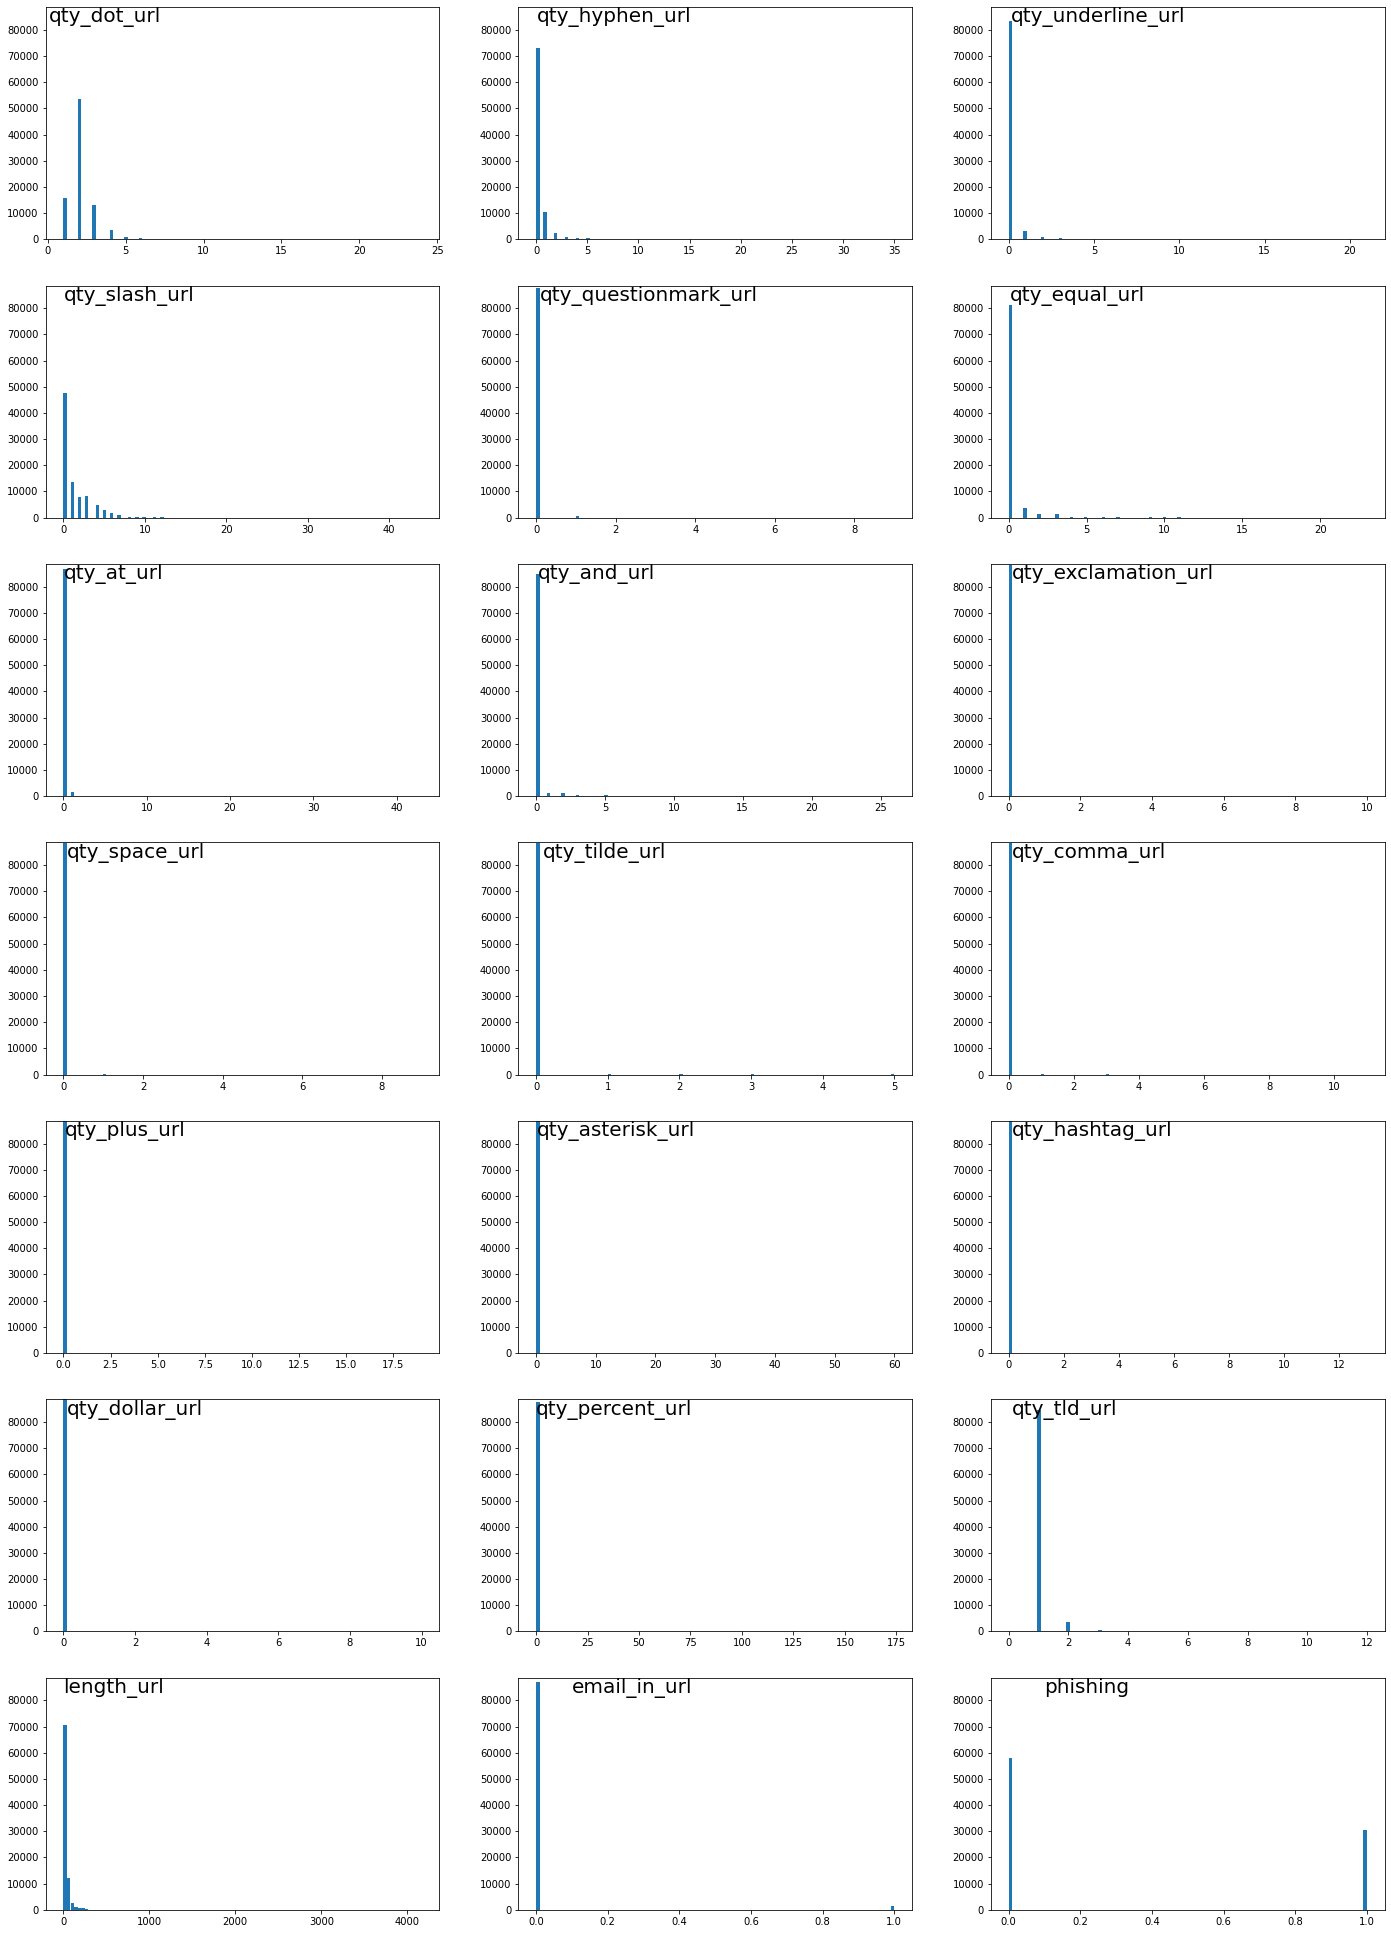

In [213]:
multiple_hist(df1)

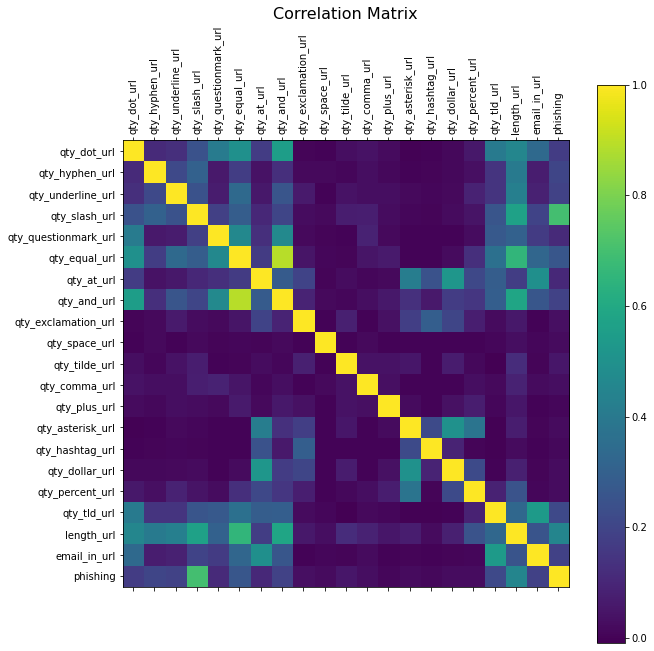

In [214]:
#df_scatter_plots(df, 'domain_length', 'phishing')
corr_matrix(df1)

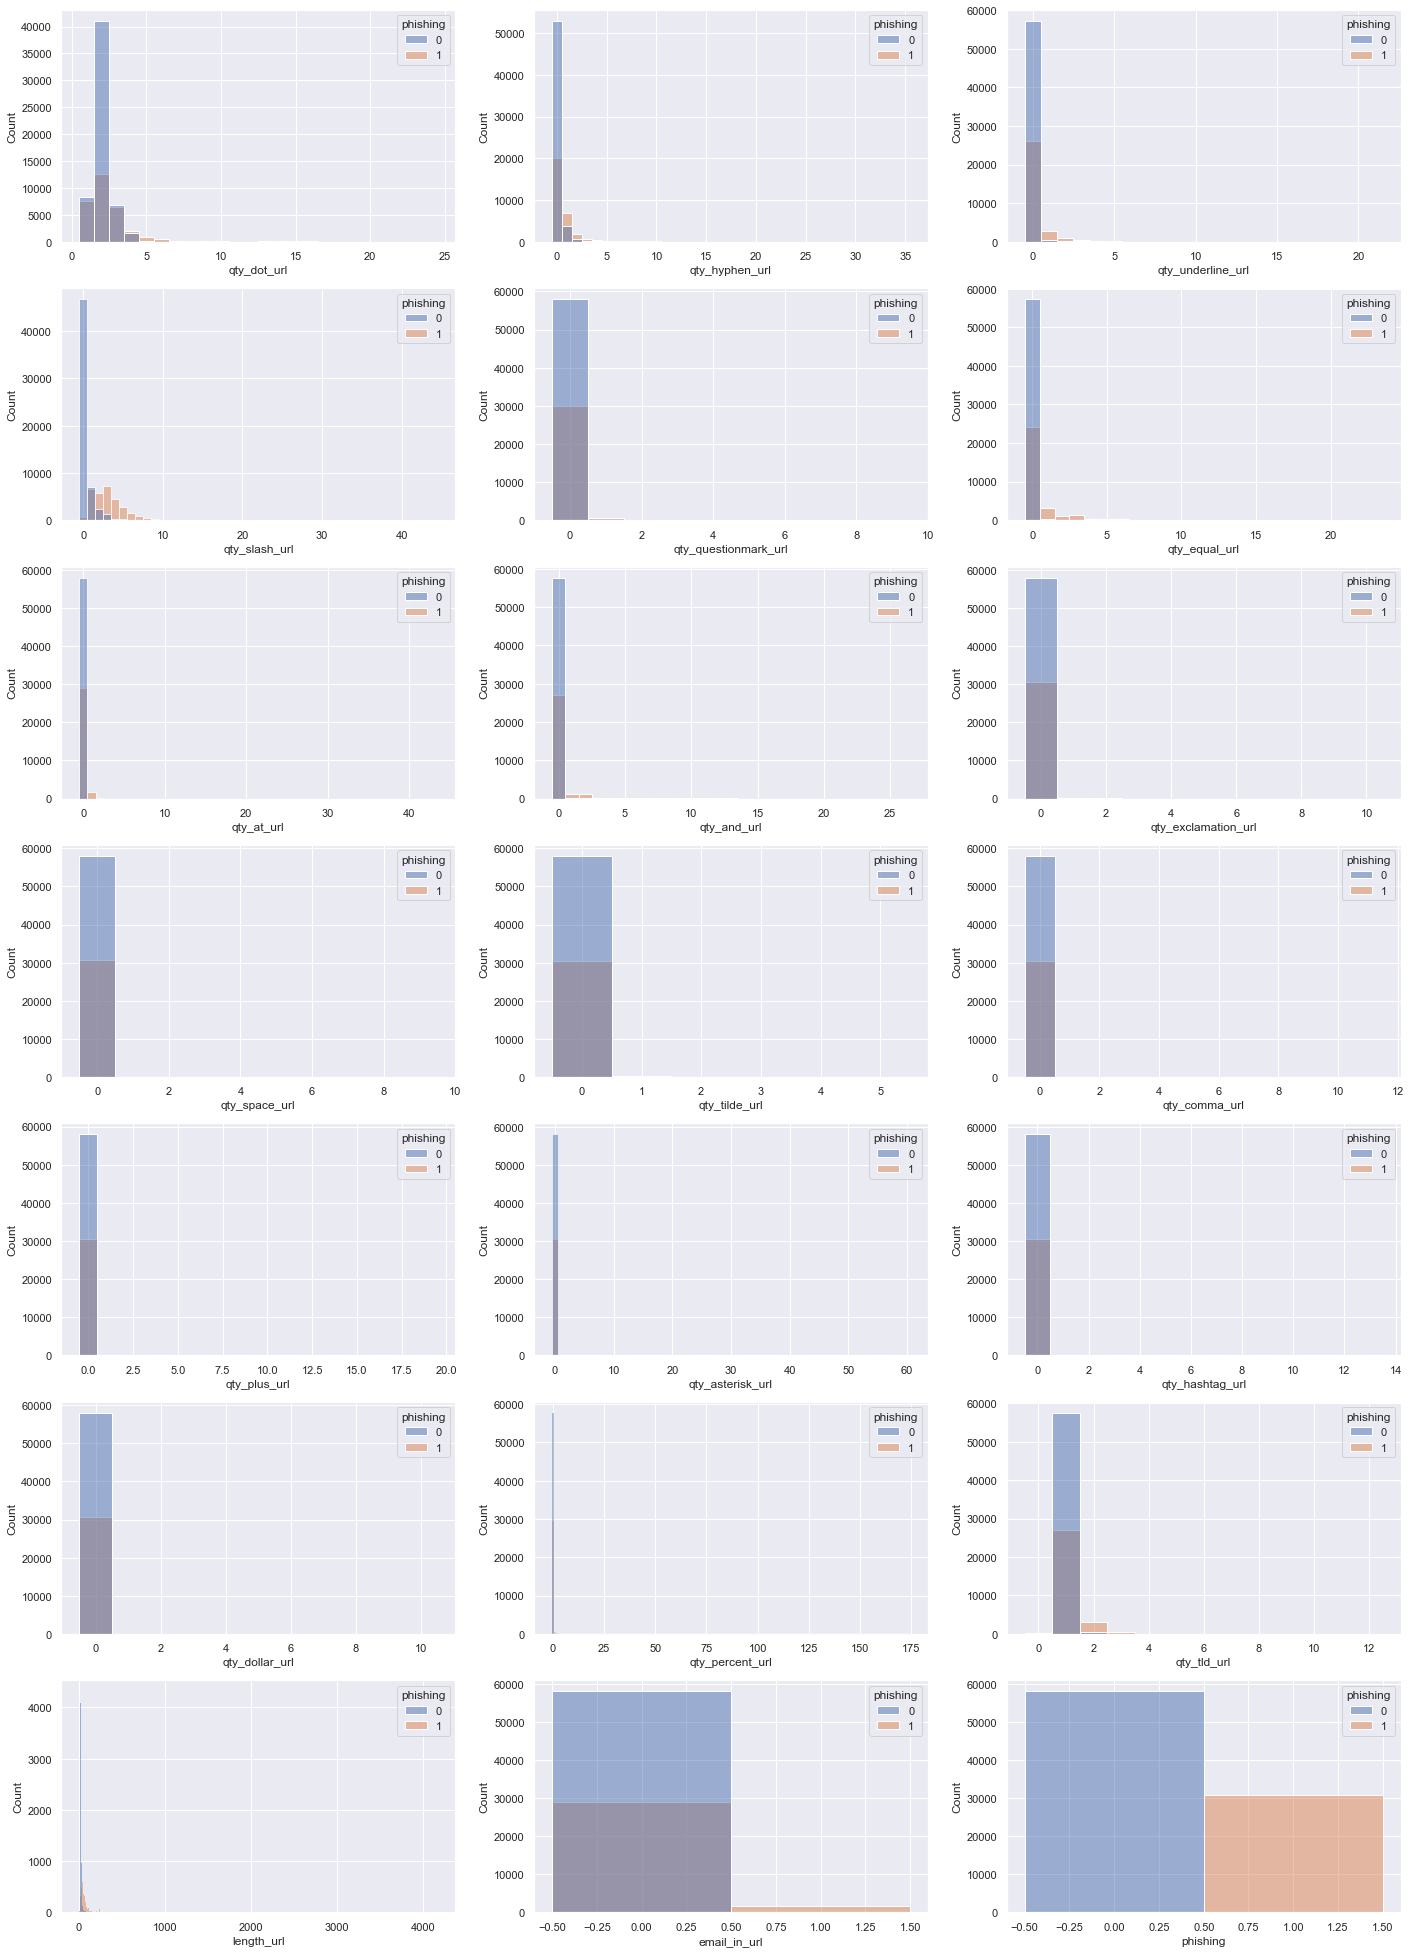

In [332]:
multiple_hist_hue(df1)

### Domain String

In [216]:
print("Number of columns ending in {}: {}".format("domain", len(df.columns[df.columns.str.endswith("domain")])))
print(df.columns[df.columns.str.endswith("domain")].tolist() + ['domain_length', 'domain_in_ip','phishing'])

Number of columns ending in domain: 6
['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_at_domain', 'qty_vowels_domain', 'server_client_domain', 'domain_length', 'domain_in_ip', 'phishing']


In [217]:
df2 = df[df.columns[df.columns.str.endswith("domain")].tolist() + ['domain_length', 'domain_in_ip','phishing']]
df2.head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,server_client_domain,domain_length,domain_in_ip,phishing
0,2,0,0,0,4,0,17,0,1
1,2,0,0,0,5,0,16,0,1
2,2,0,0,0,3,0,14,0,0
3,2,0,0,0,7,0,19,0,1
4,2,0,0,0,5,0,19,0,0


In [261]:
df2.shape

(88647, 9)

In [218]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_domain,88647.0,1.870622,0.705607,0.0,1.0,2.0,2.0,21.0
qty_hyphen_domain,88647.0,0.114578,0.421957,0.0,0.0,0.0,0.0,11.0
qty_underline_domain,88647.0,0.000756,0.032381,0.0,0.0,0.0,0.0,3.0
qty_at_domain,88647.0,0.000011,0.003359,0.0,0.0,0.0,0.0,1.0
qty_vowels_domain,88647.0,5.440590,2.541244,0.0,4.0,5.0,7.0,61.0
server_client_domain,88647.0,0.004501,0.066939,0.0,0.0,0.0,0.0,1.0
domain_length,88647.0,18.560820,6.598694,4.0,14.0,18.0,22.0,231.0
domain_in_ip,88647.0,0.002267,0.047564,0.0,0.0,0.0,0.0,1.0
phishing,88647.0,0.345720,0.475605,0.0,0.0,0.0,1.0,1.0


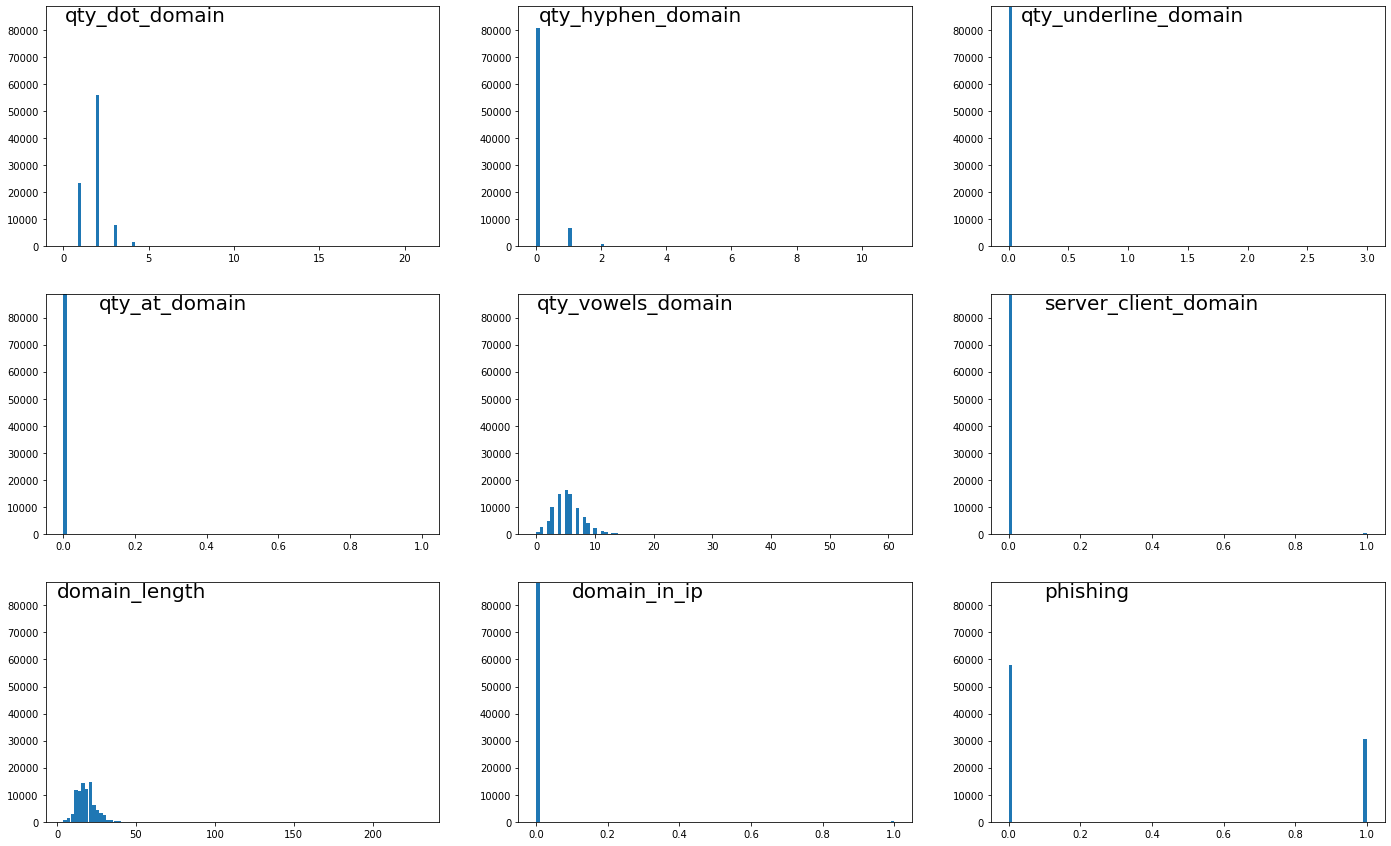

In [219]:
multiple_hist(df2)

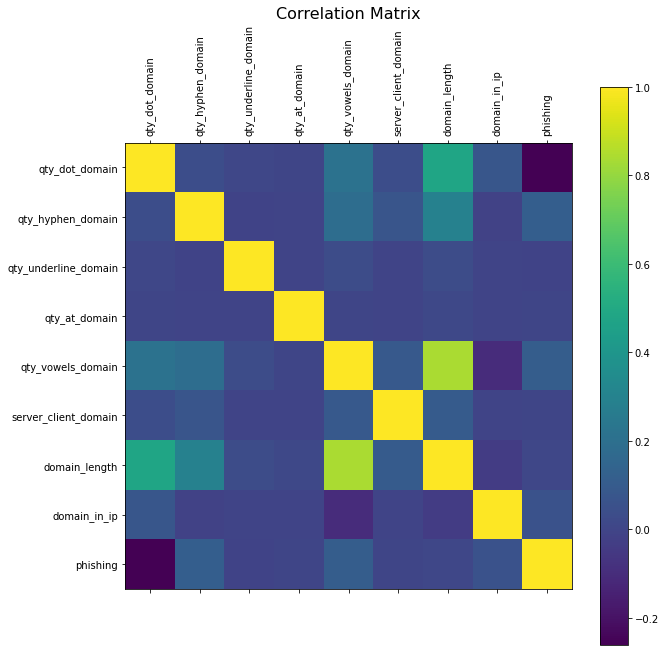

In [220]:
corr_matrix(df2)

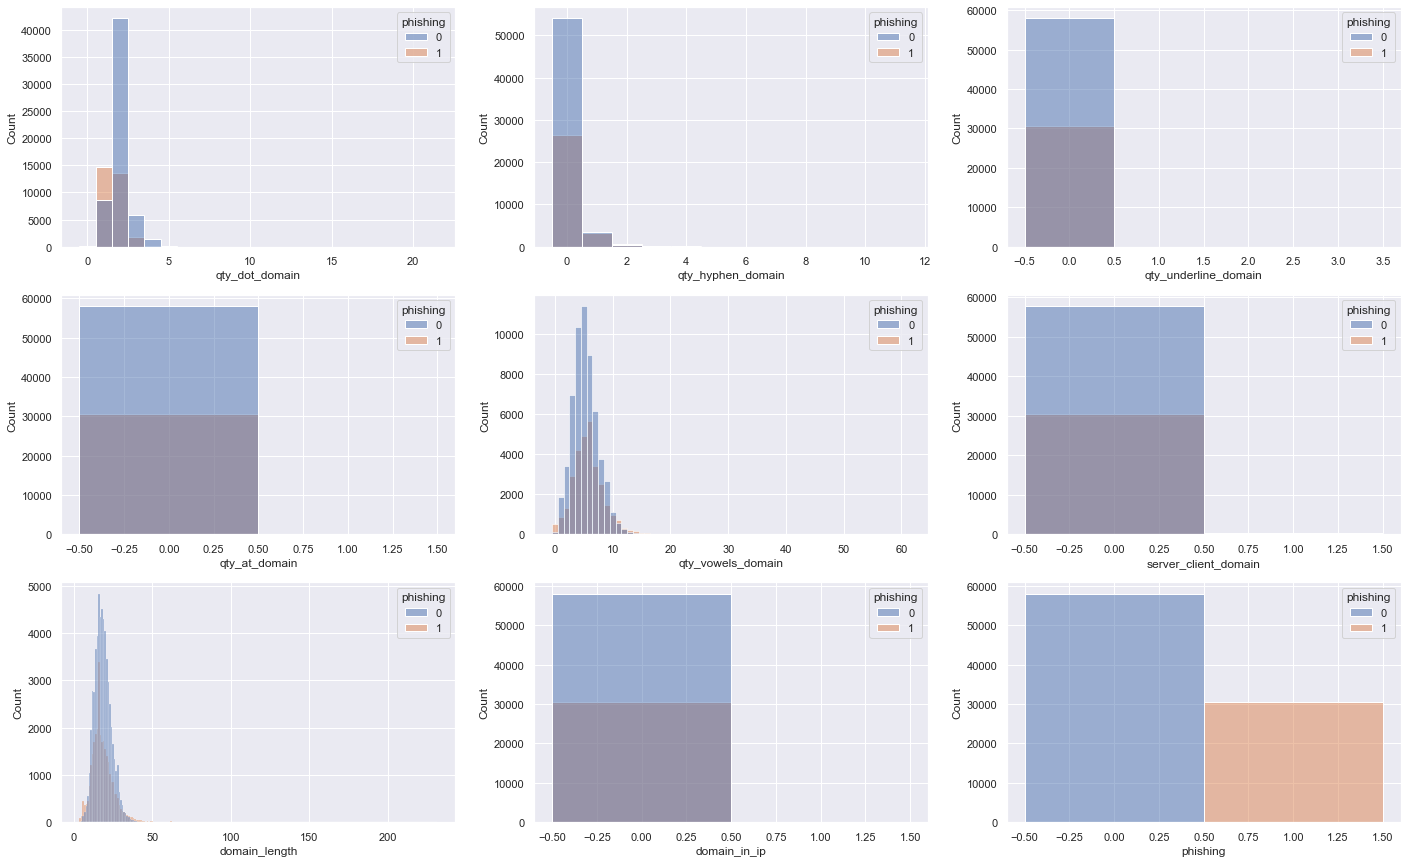

In [340]:
multiple_hist_hue(df2)

### Directory String

In [221]:
print("Number of columns ending in {}: {}".format("directory", len(df.columns[df.columns.str.endswith("directory")])))
print(df.columns[df.columns.str.endswith("directory")].tolist() + ['directory_length', 'phishing'])

Number of columns ending in directory: 15
['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'phishing']


In [222]:
df3 = df[df.columns[df.columns.str.endswith("directory")].tolist() + ['directory_length', 'phishing']]
df3.head()

,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_dollar_directory,qty_percent_directory,directory_length,phishing
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,1
1,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,42,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,62,1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [247]:
df3.shape

(88647, 17)

In [223]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_directory,88647.0,-0.323666,0.899499,-1.0,-1.0,-1.0,0.0,19.0
qty_hyphen_directory,88647.0,-0.360813,1.101398,-1.0,-1.0,-1.0,0.0,23.0
qty_underline_directory,88647.0,-0.477997,0.682409,-1.0,-1.0,-1.0,0.0,17.0
qty_slash_directory,88647.0,0.713685,2.216137,-1.0,-1.0,-1.0,2.0,22.0
qty_equal_directory,88647.0,-0.528343,0.517986,-1.0,-1.0,-1.0,0.0,5.0
qty_at_directory,88647.0,-0.532550,0.551786,-1.0,-1.0,-1.0,0.0,43.0
qty_and_directory,88647.0,-0.531422,0.538253,-1.0,-1.0,-1.0,0.0,26.0
qty_exclamation_directory,88647.0,-0.534310,0.504044,-1.0,-1.0,-1.0,0.0,9.0
qty_space_directory,88647.0,-0.535145,0.503964,-1.0,-1.0,-1.0,0.0,9.0
qty_tilde_directory,88647.0,-0.532765,0.508092,-1.0,-1.0,-1.0,0.0,5.0


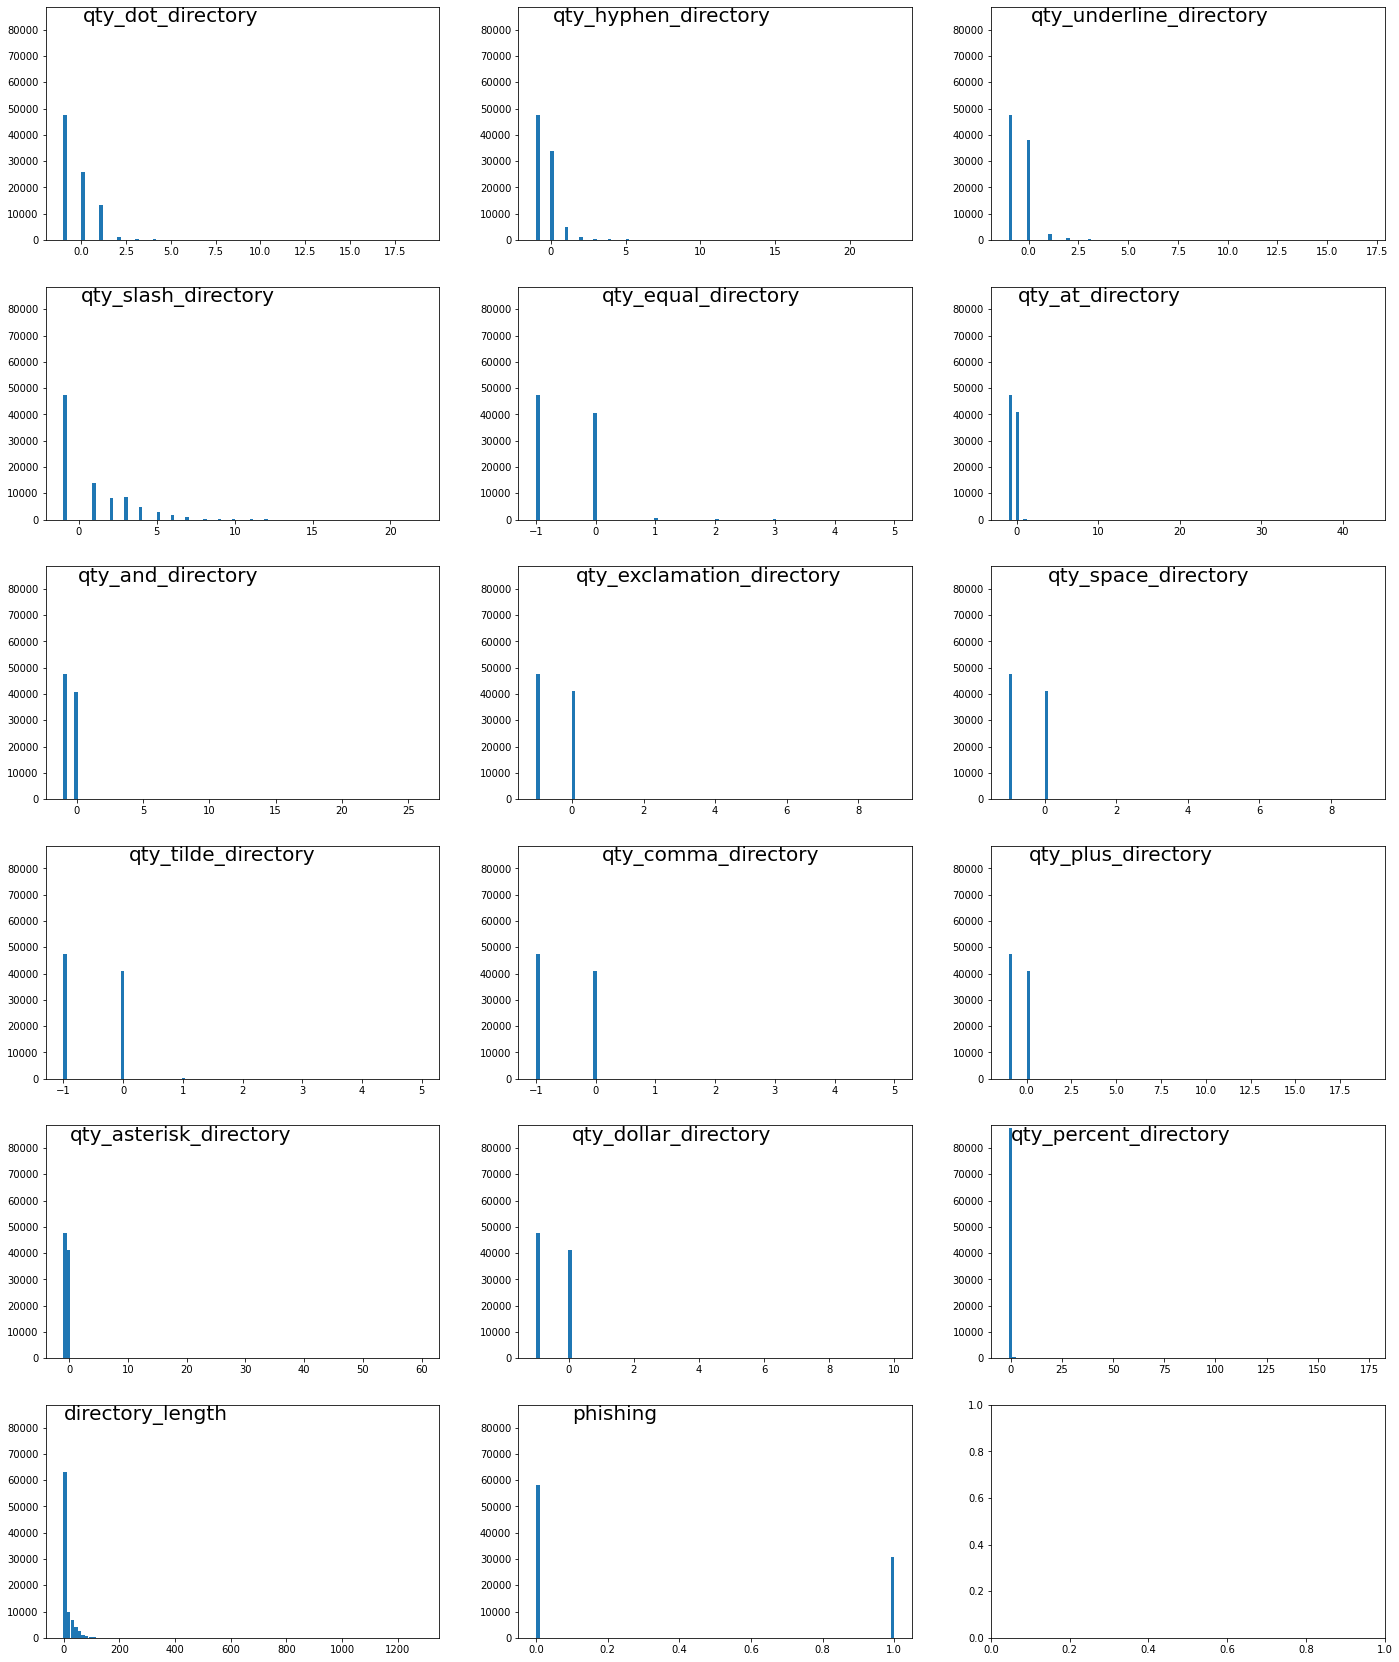

In [224]:
multiple_hist(df3)

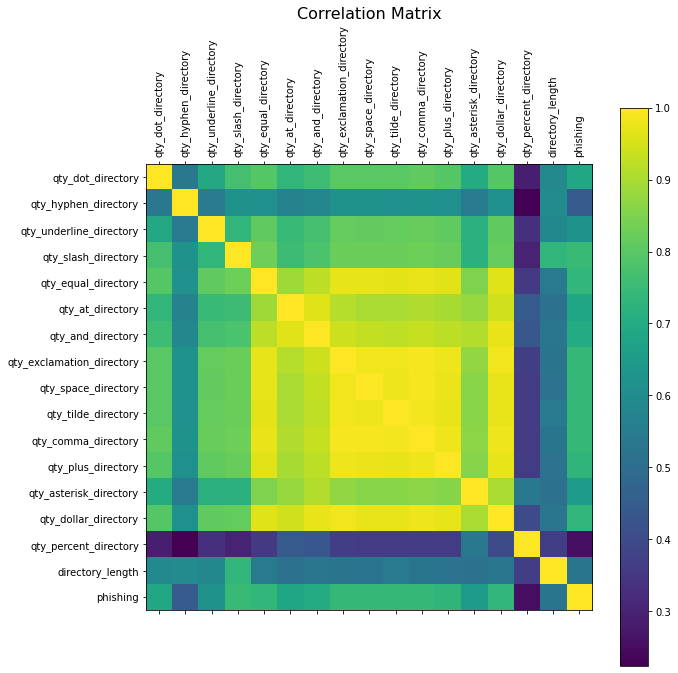

In [225]:
corr_matrix(df3)

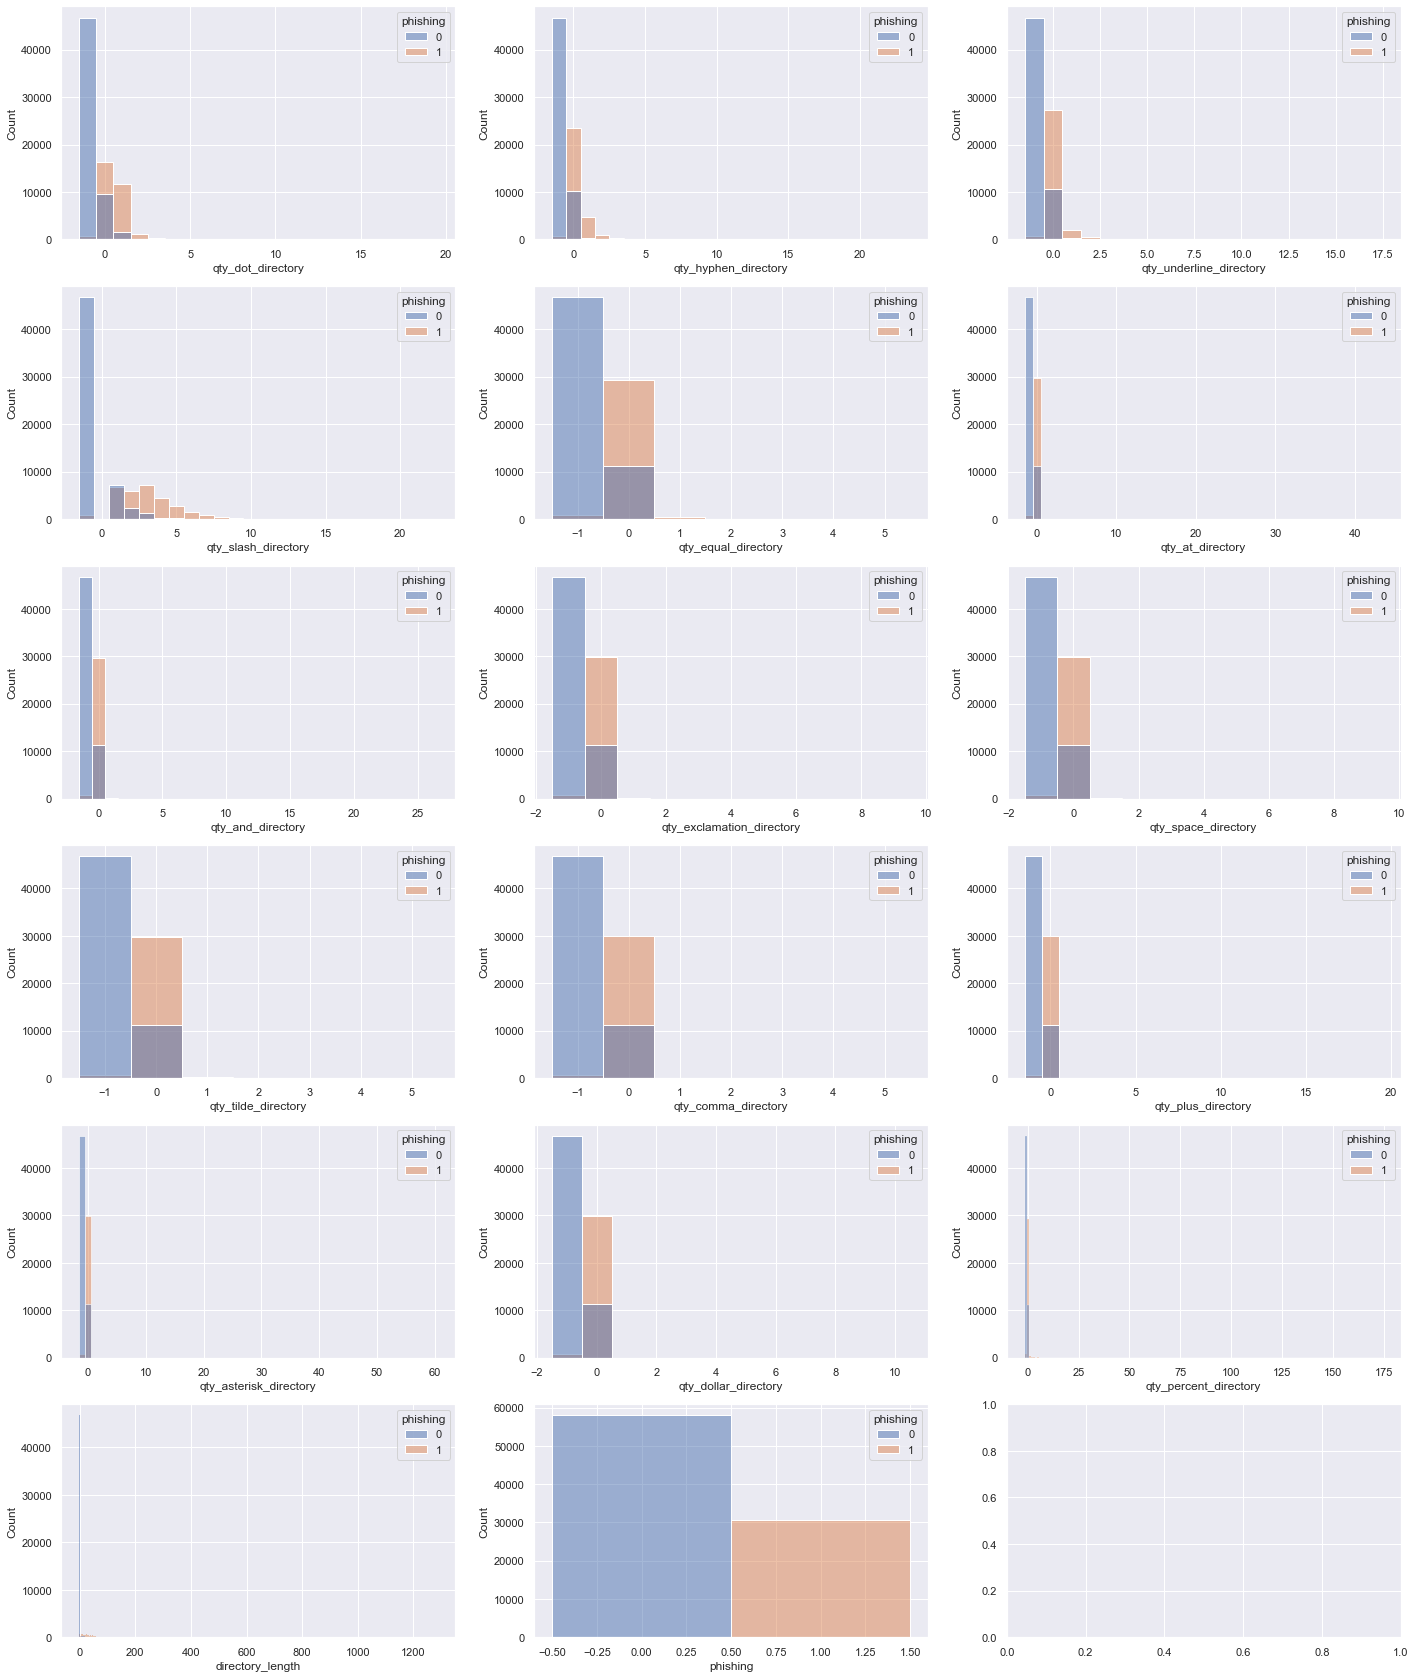

In [341]:
multiple_hist_hue(df3)

#### % of domain level URLs

In [355]:
pie = {}
pie = {"domain_level URLs, label 0" : df3[(df3['directory_length'] == -1) & (df3['phishing'] == 0)].shape[0] / df3.shape[0],
       "domain_level URLs, label 1" : df3[(df3['directory_length'] == -1) & (df3['phishing'] == 1)].shape[0] / df3.shape[0],
        "path_level URLs, label 0" : df3[(df3['directory_length'] != -1) & (df3['phishing'] == 0)].shape[0] / df3.shape[0],
        "path_level URLs, label 1" : df3[(df3['directory_length'] != -1) & (df3['phishing'] == 1)].shape[0] / df3.shape[0]}
pie

{'domain_level URLs, label 0': 0.5275079810935508,
 'domain_level URLs, label 1': 0.008426681105959592,
 'path_level URLs, label 0': 0.1267724796101391,
 'path_level URLs, label 1': 0.3372928581903505}

C:\Users\magni\AppData\Local\Temp/ipykernel_1164/3142106026.py:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([float(pie[v]) for v in pie], labels=[str(k) for k in pie], autopct='%1.1f%%')


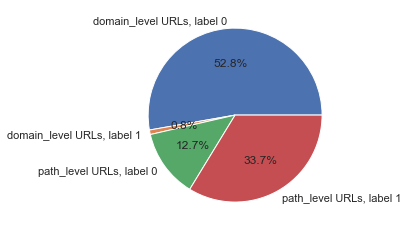

In [356]:
plt.pie([float(pie[v]) for v in pie], labels=[str(k) for k in pie], autopct='%1.1f%%')
plt.show()

### File String

In [226]:
print("Number of columns ending in {}: {}".format("file", len(df.columns[df.columns.str.endswith("file")])))
print(df.columns[df.columns.str.endswith("file")].tolist() + ['file_length', 'phishing'])

Number of columns ending in file: 13
['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_percent_file', 'file_length', 'phishing']


In [227]:
df4 = df[df.columns[df.columns.str.endswith("file")].tolist() + ['file_length', 'phishing']]
df4.head()

,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_percent_file,file_length,phishing
0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,9,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,9,1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [228]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_file,88647.0,-0.368710,0.766855,-1.0,-1.0,-1.0,0.0,12.0
qty_hyphen_file,88647.0,-0.478087,0.800562,-1.0,-1.0,-1.0,0.0,21.0
qty_underline_file,88647.0,-0.510756,0.604840,-1.0,-1.0,-1.0,0.0,17.0
qty_equal_file,88647.0,-0.534288,0.502970,-1.0,-1.0,-1.0,0.0,3.0
qty_at_file,88647.0,-0.535641,0.499341,-1.0,-1.0,-1.0,0.0,2.0
qty_and_file,88647.0,-0.534513,0.501764,-1.0,-1.0,-1.0,0.0,3.0
qty_exclamation_file,88647.0,-0.534897,0.501018,-1.0,-1.0,-1.0,0.0,4.0
qty_space_file,88647.0,-0.535506,0.501447,-1.0,-1.0,-1.0,0.0,9.0
qty_tilde_file,88647.0,-0.535641,0.499657,-1.0,-1.0,-1.0,0.0,4.0
qty_comma_file,88647.0,-0.535371,0.500872,-1.0,-1.0,-1.0,0.0,5.0


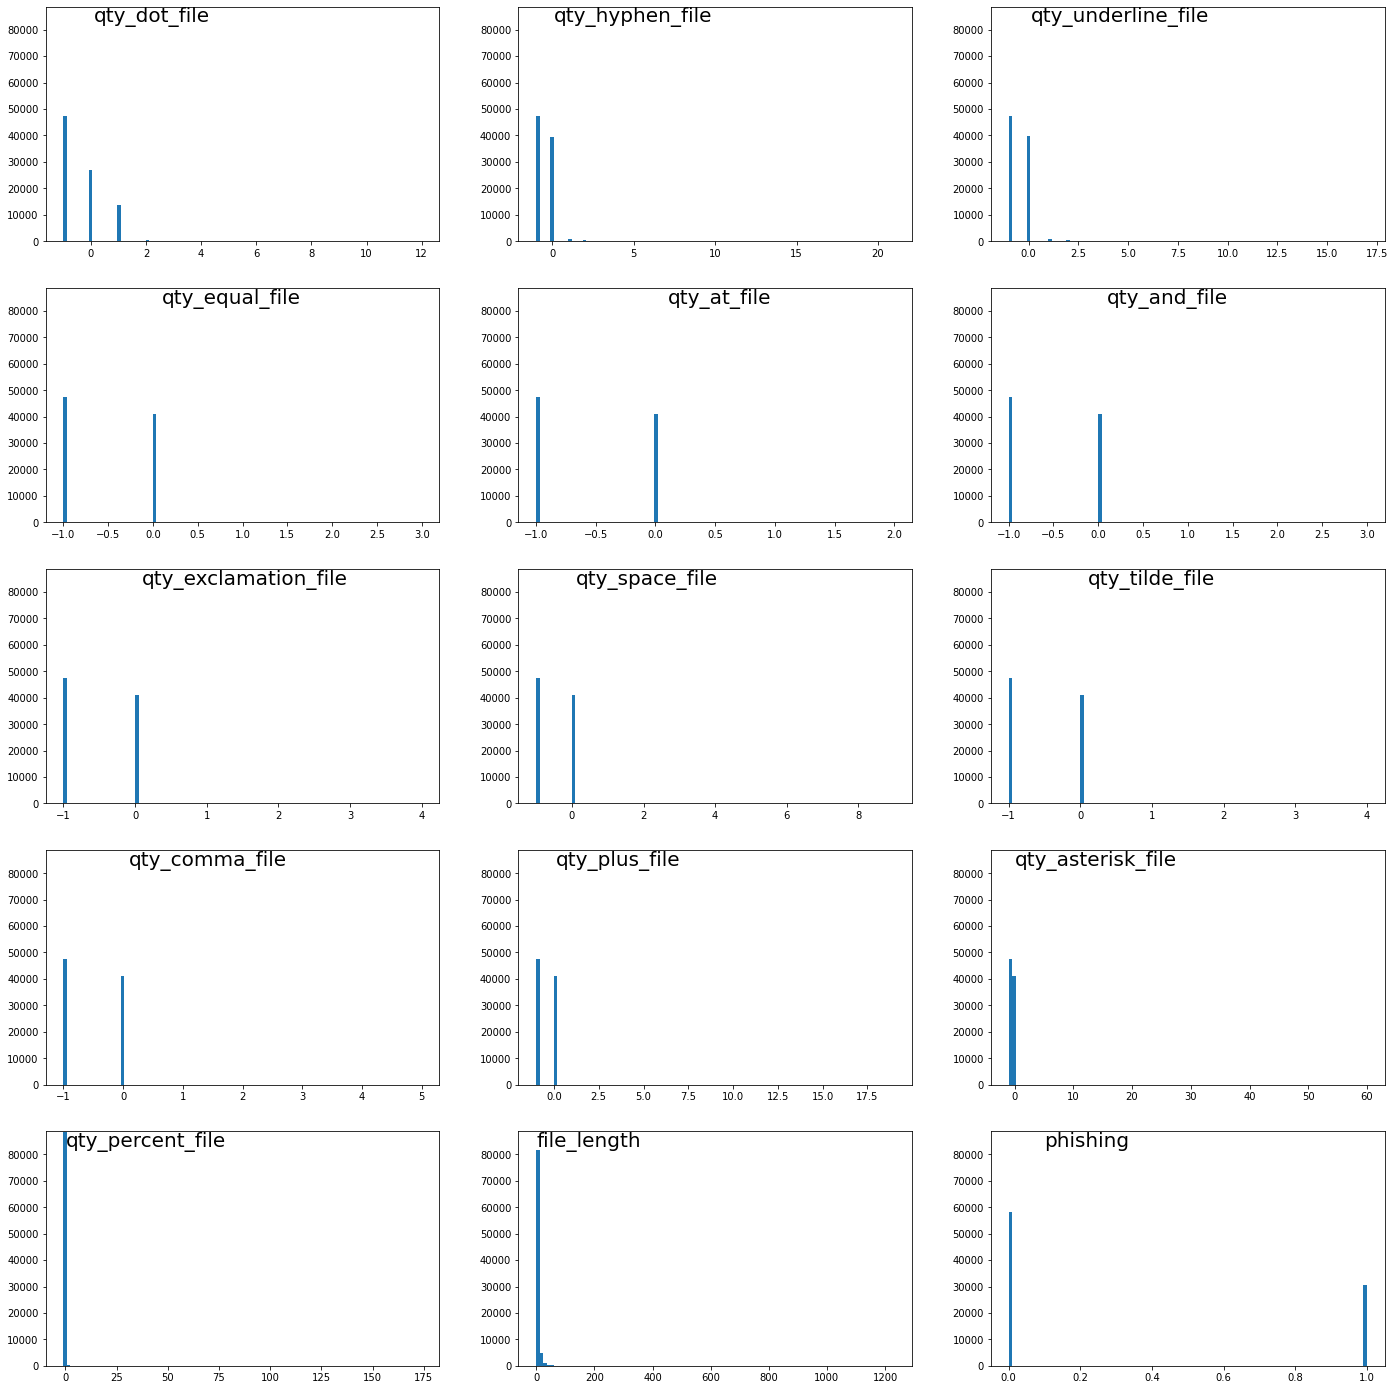

In [229]:
multiple_hist(df4)

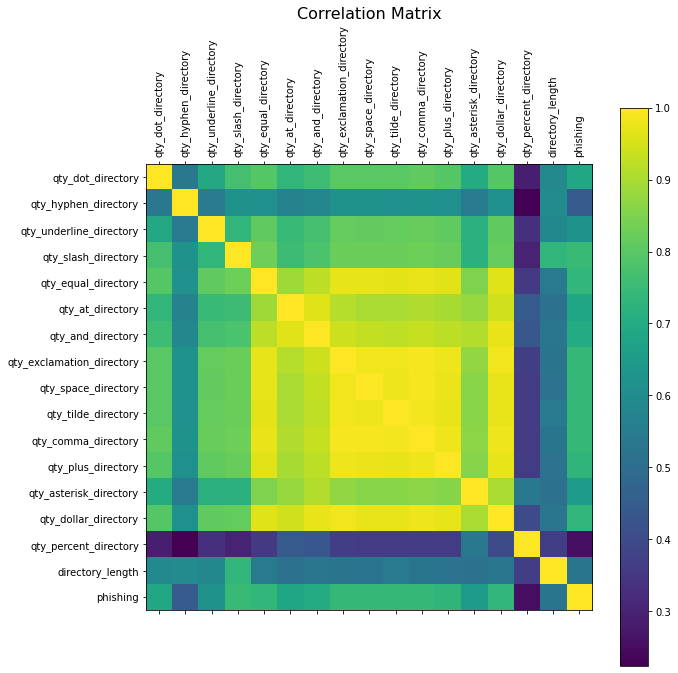

In [230]:
corr_matrix(df3)

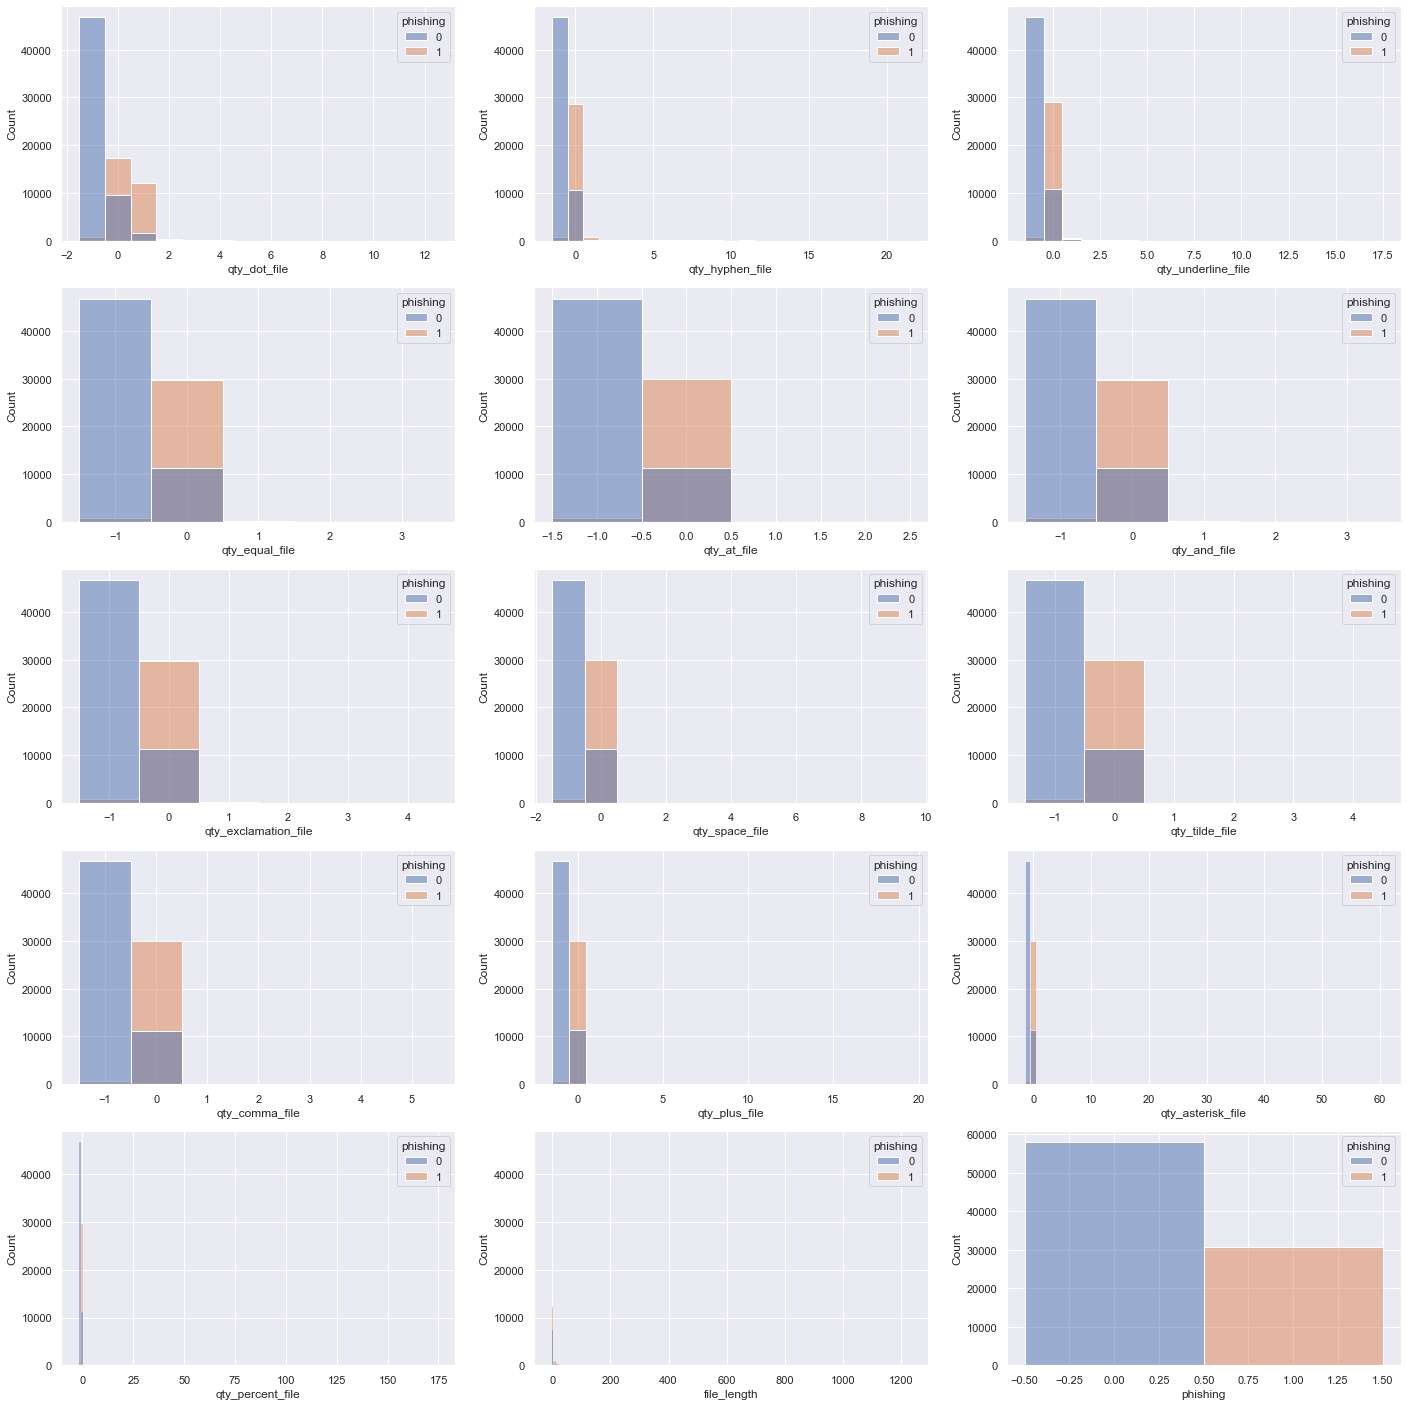

In [357]:
multiple_hist_hue(df4)

In [360]:
pie_file = {}
pie_file = {"domain_level URLs, label 0" : df4[(df4['file_length'] == -1) & (df4['phishing'] == 0)].shape[0] / df4.shape[0],
       "domain_level URLs, label 1" : df4[(df4['file_length'] == -1) & (df4['phishing'] == 1)].shape[0] / df4.shape[0],
        "path_level URLs, label 0" : df4[(df4['file_length'] != -1) & (df4['phishing'] == 0)].shape[0] / df4.shape[0],
        "path_level URLs, label 1" : df4[(df4['file_length'] != -1) & (df4['phishing'] == 1)].shape[0] / df4.shape[0]}
pie_file

{'domain_level URLs, label 0': 0.5275079810935508,
 'domain_level URLs, label 1': 0.008426681105959592,
 'path_level URLs, label 0': 0.1267724796101391,
 'path_level URLs, label 1': 0.3372928581903505}

### Parameters String

In [248]:
print("Number of columns ending in {}: {}".format("params", len(df.columns[df.columns.str.endswith("params")])))
print(df.columns[df.columns.str.endswith("params")].tolist() + ['params_length', 'phishing'])

Number of columns ending in params: 18
['qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params', 'qty_dollar_params', 'qty_percent_params', 'tld_present_params', 'qty_params', 'params_length', 'phishing']


In [251]:
df5 = df[df.columns[df.columns.str.endswith("params")].tolist() + ['params_length', 'phishing']]
df5.head()

,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_dollar_params,qty_percent_params,tld_present_params,qty_params,params_length,phishing
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,3,165,1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [252]:
df5.shape

(88647, 20)

In [253]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_params,88647.0,-0.811093,0.979810,-1.0,-1.0,-1.0,-1.0,23.0
qty_hyphen_params,88647.0,-0.878608,0.633243,-1.0,-1.0,-1.0,-1.0,35.0
qty_underline_params,88647.0,-0.862251,0.656253,-1.0,-1.0,-1.0,-1.0,21.0
qty_slash_params,88647.0,-0.888129,0.545884,-1.0,-1.0,-1.0,-1.0,43.0
qty_questionmark_params,88647.0,-0.907825,0.321486,-1.0,-1.0,-1.0,-1.0,9.0
qty_equal_params,88647.0,-0.727255,1.111254,-1.0,-1.0,-1.0,-1.0,23.0
qty_at_params,88647.0,-0.898248,0.359587,-1.0,-1.0,-1.0,-1.0,10.0
qty_and_params,88647.0,-0.788825,1.015908,-1.0,-1.0,-1.0,-1.0,22.0
qty_exclamation_params,88647.0,-0.915778,0.282554,-1.0,-1.0,-1.0,-1.0,10.0
qty_space_params,88647.0,-0.916196,0.277624,-1.0,-1.0,-1.0,-1.0,4.0


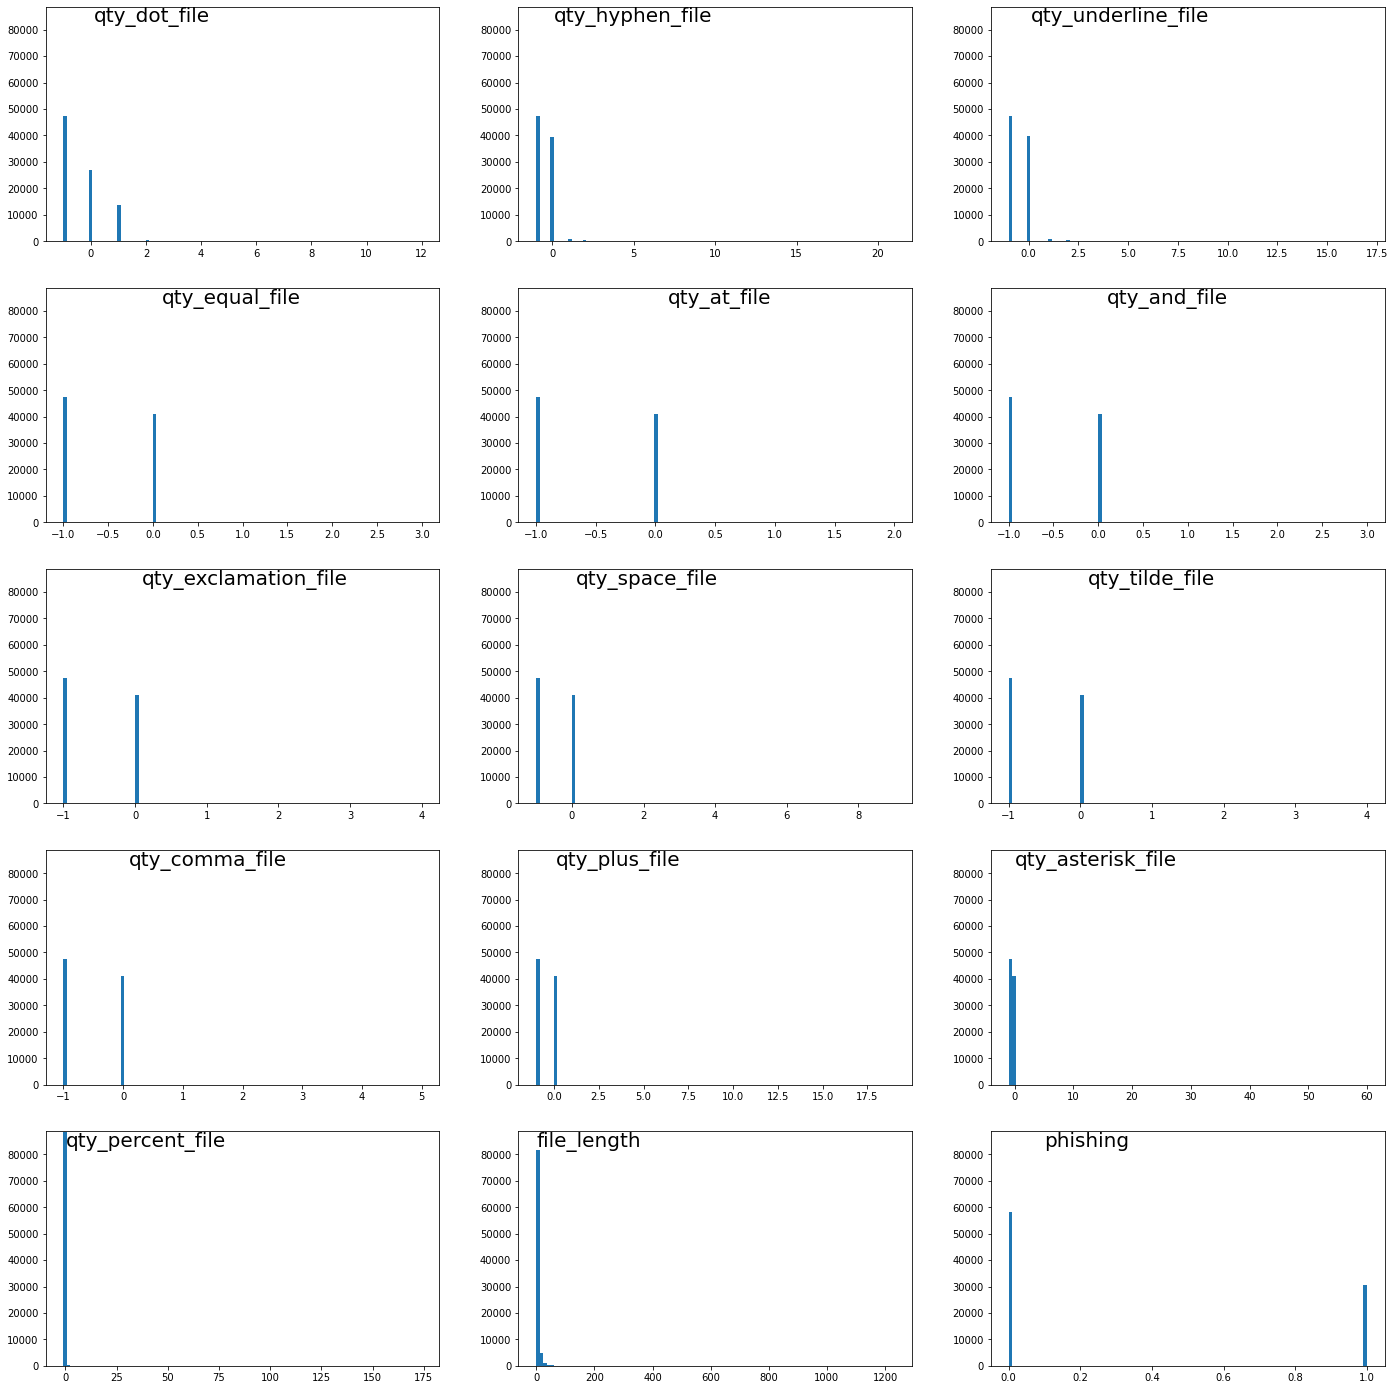

In [234]:
multiple_hist(df5)

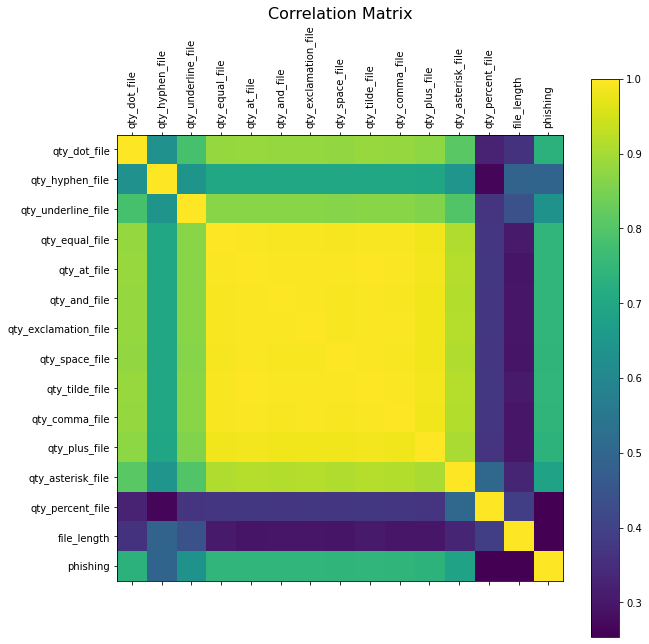

In [235]:
corr_matrix(df5)

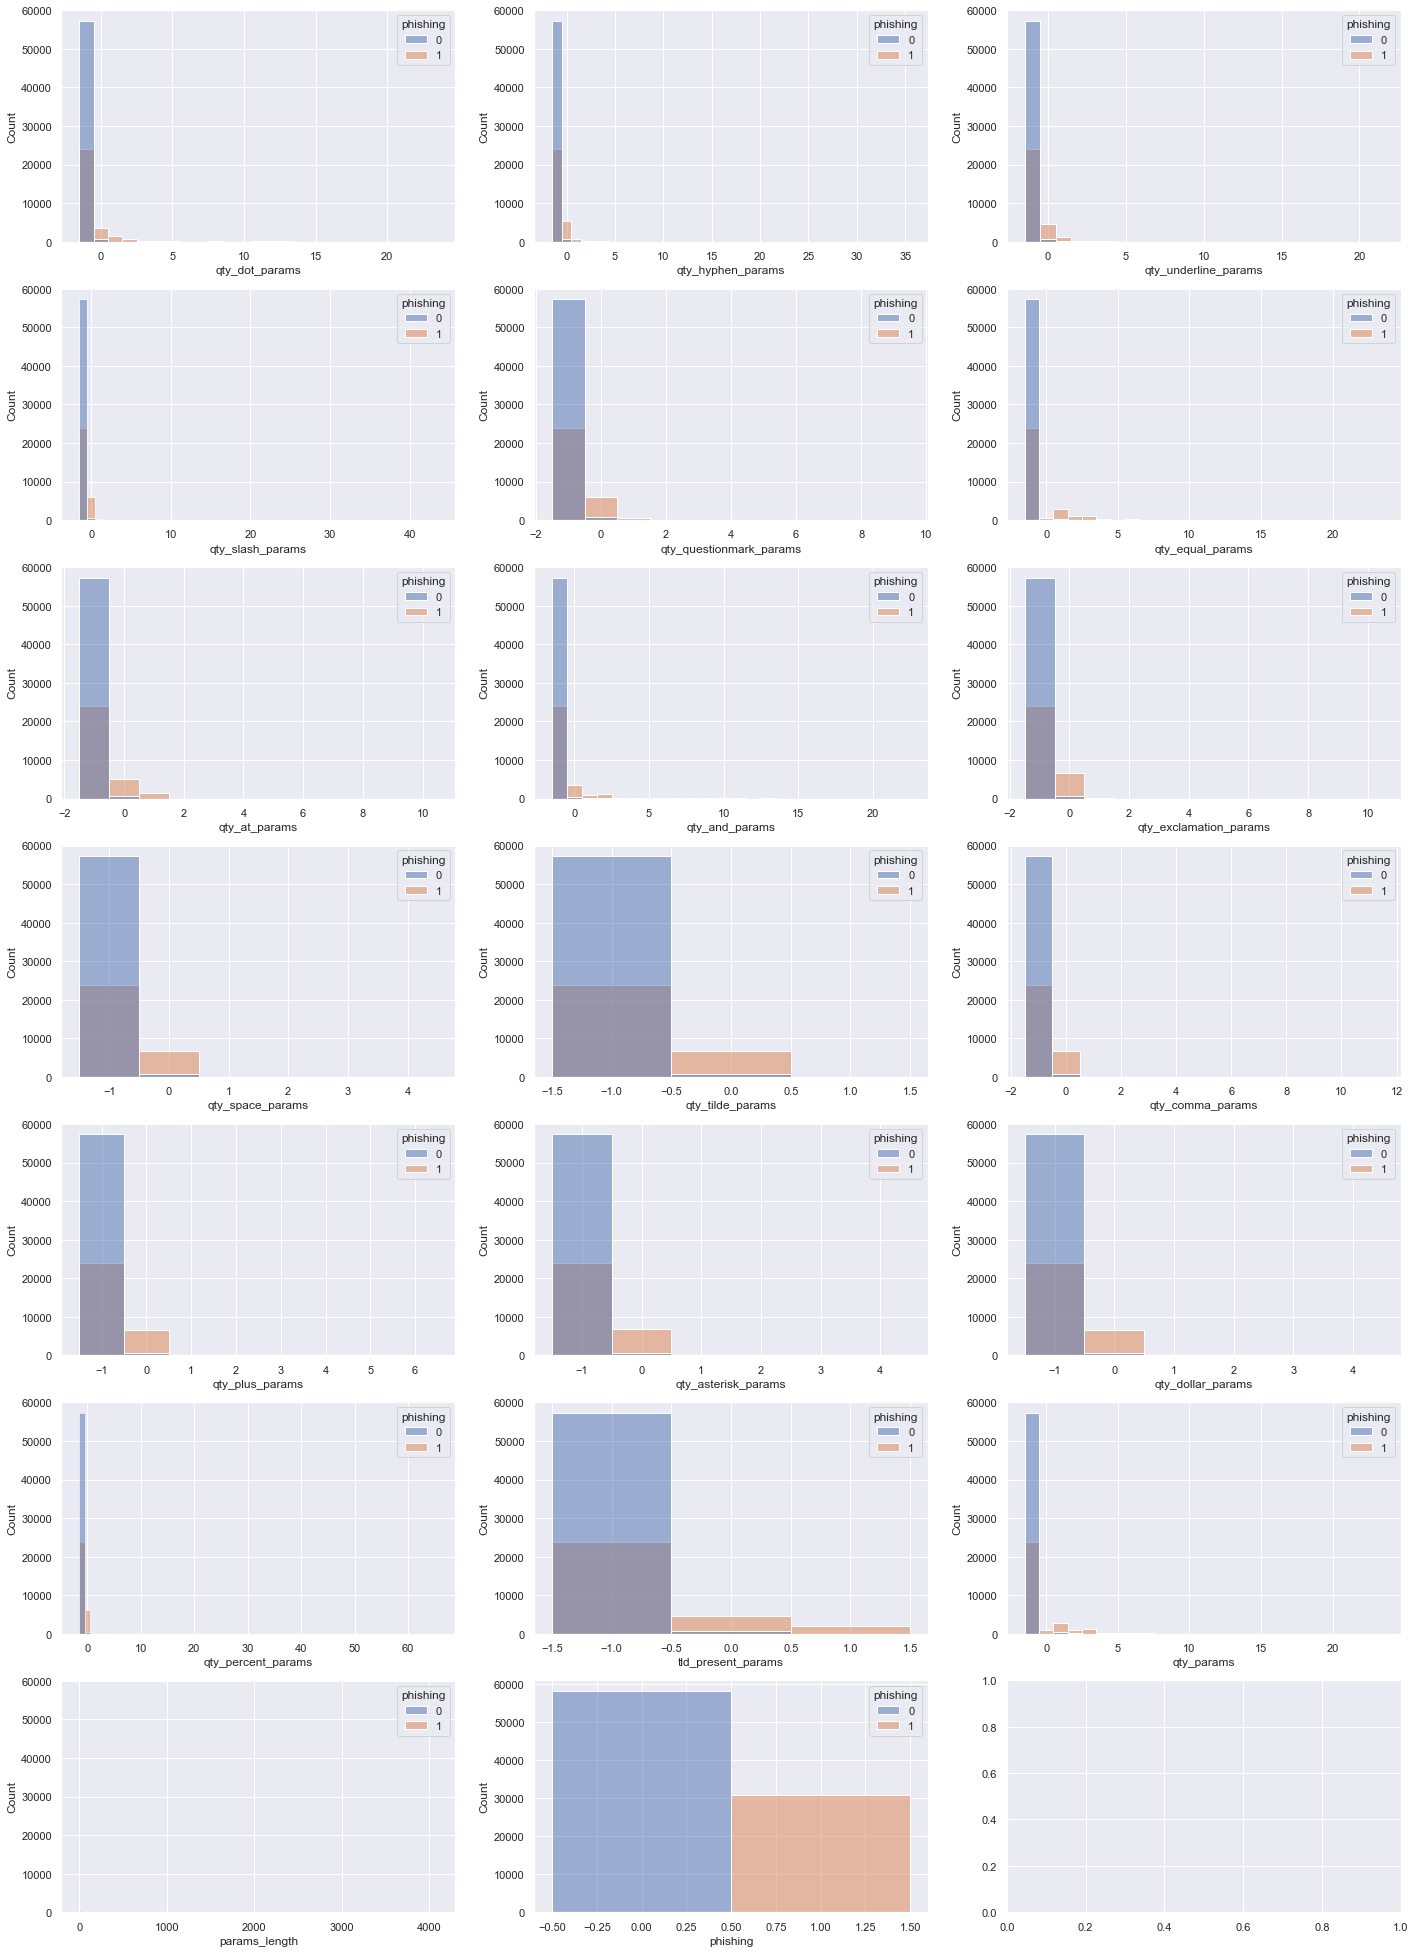

In [361]:
multiple_hist_hue(df5)

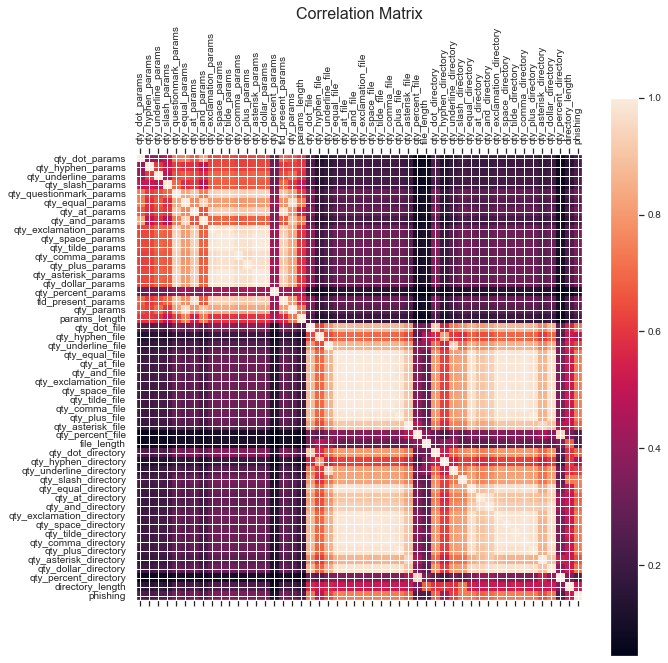

In [365]:
path_df = pd.concat([df5.iloc[:,:-1], df4.iloc[:,:-1], df3], axis=1)
corr_matrix(path_df)

### Other attributes

In [254]:
other_att_cols=['time_response','domain_spf','asn_ip','time_domain_activation','time_domain_expiration','qty_ip_resolved','qty_nameservers','qty_mx_servers','ttl_hostname','tls_ssl_certificate','qty_redirects','url_google_index','domain_google_index','url_shortened','phishing']
print("Number of other attributes columns {}".format(len(other_att_cols)))
print(other_att_cols)

Number of other attributes columns 15
['time_response', 'domain_spf', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects', 'url_google_index', 'domain_google_index', 'url_shortened', 'phishing']


In [255]:
df6 = df[other_att_cols]
df6.head()

,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [257]:
df6.shape

(88647, 15)

In [256]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
time_response,88647.0,0.793878,1.468417,-1.0,0.241038,0.466492,0.874495,38.402411
domain_spf,88647.0,-0.017925,0.559366,-1.0,0.000000,0.000000,0.000000,1.000000
asn_ip,88647.0,31131.152763,45261.502645,-1.0,13335.000000,20013.000000,34922.000000,395754.000000
time_domain_activation,88647.0,3389.676661,3044.165723,-1.0,-1.000000,3046.000000,6423.000000,17775.000000
time_domain_expiration,88647.0,352.043250,598.264801,-1.0,-1.000000,168.000000,354.000000,22574.000000
qty_ip_resolved,88647.0,1.136564,0.895146,-1.0,1.000000,1.000000,1.000000,24.000000
qty_nameservers,88647.0,2.772412,1.322999,0.0,2.000000,2.000000,4.000000,20.000000
qty_mx_servers,88647.0,1.742428,1.706705,0.0,1.000000,1.000000,2.000000,20.000000
ttl_hostname,88647.0,6159.877514,11465.583810,-1.0,292.000000,2029.000000,10798.000000,604800.000000
tls_ssl_certificate,88647.0,0.506447,0.499961,0.0,0.000000,1.000000,1.000000,1.000000


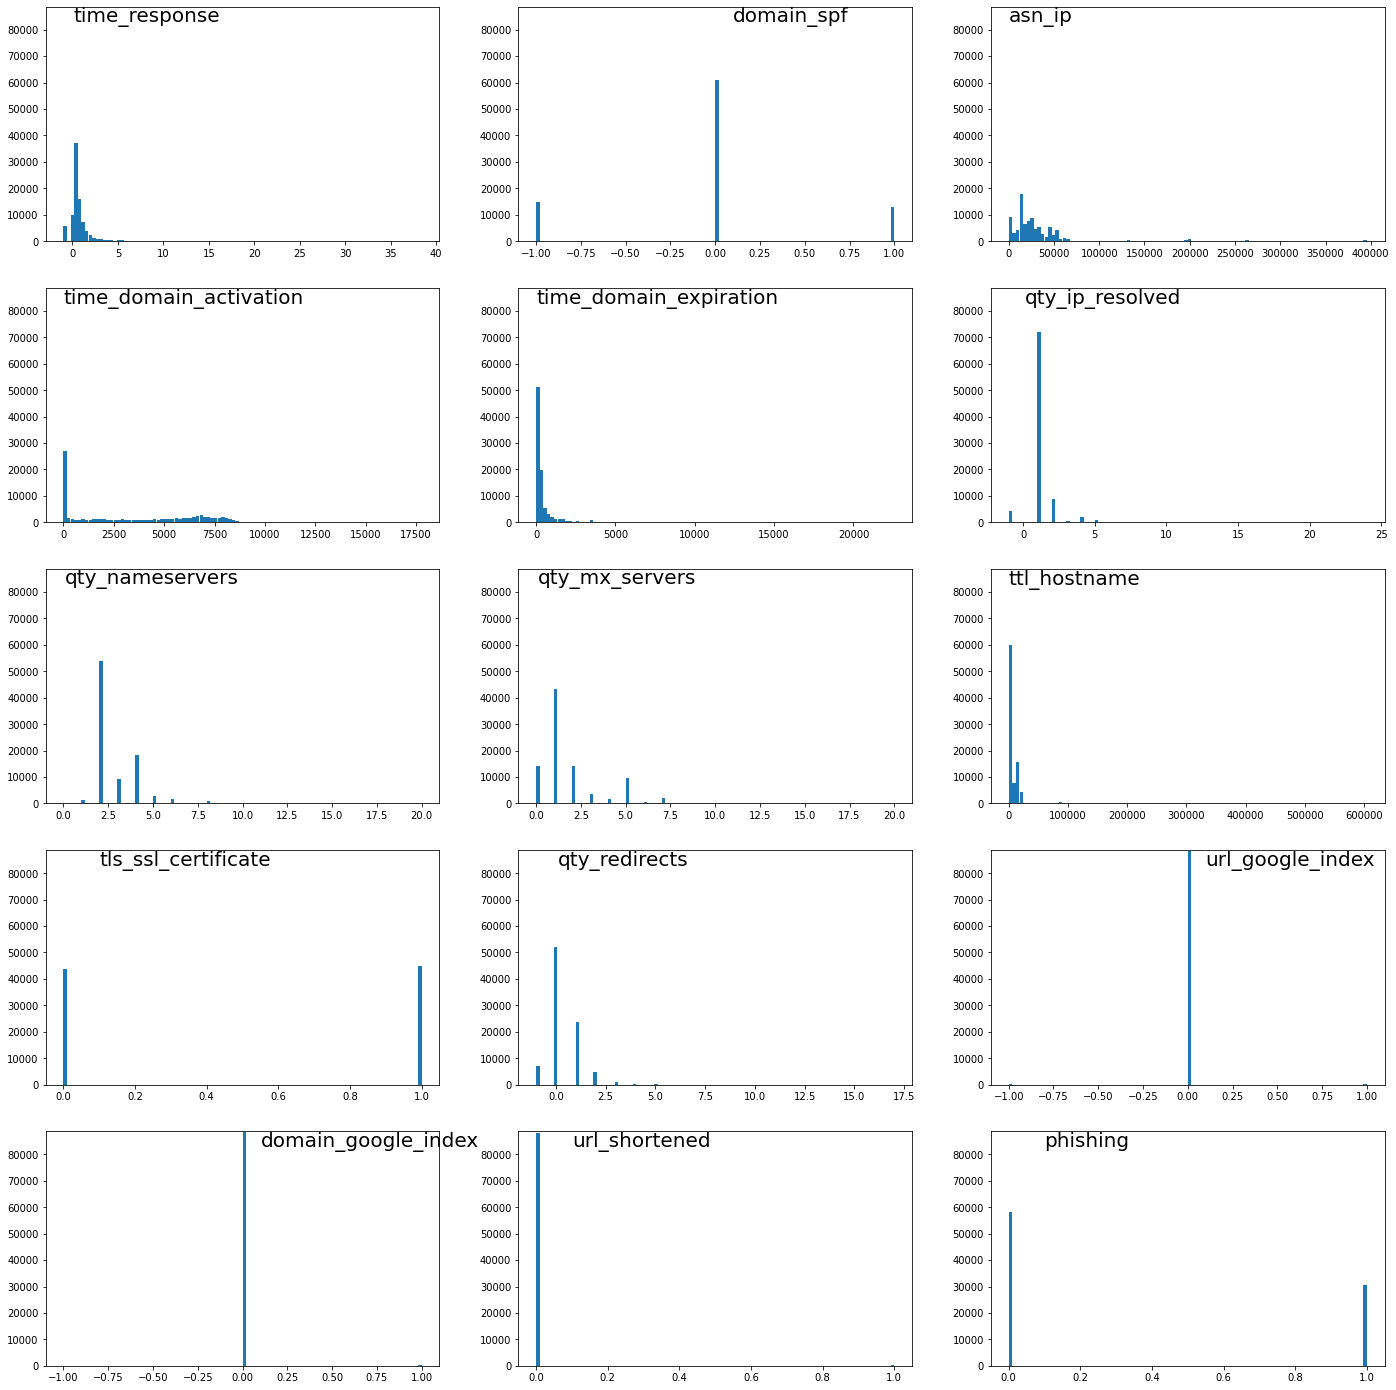

In [239]:
multiple_hist(df6)

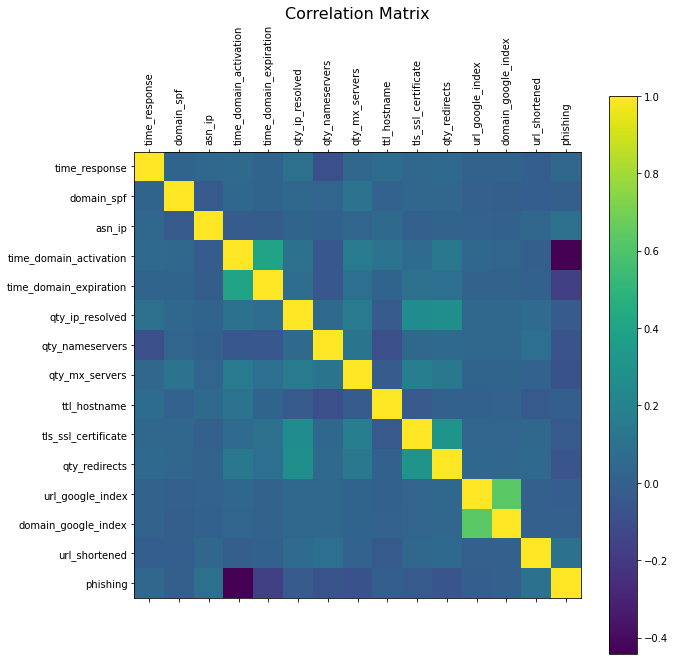

In [240]:
corr_matrix(df6)

In [368]:
df_new = pd.concat([df1.iloc[:,:-1], df2.iloc[:,:-1], df3.iloc[:,:-1], df4.iloc[:,:-1], df5.iloc[:,:-1], df6], axis=1)

In [369]:
df_new.shape

(88647, 92)

In [370]:
df_new.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,email_in_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,server_client_domain,domain_length,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_dollar_params,qty_percent_params,tld_present_params,qty_params,params_length,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,0,2,0,0,0,4,0,17,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,0,2,0,0,0,5,0,16,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,3,165,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,0,2,0,0,0,3,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,0,2,0,0,0,7,0,19,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0,2,0,0,0,5,0,19,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


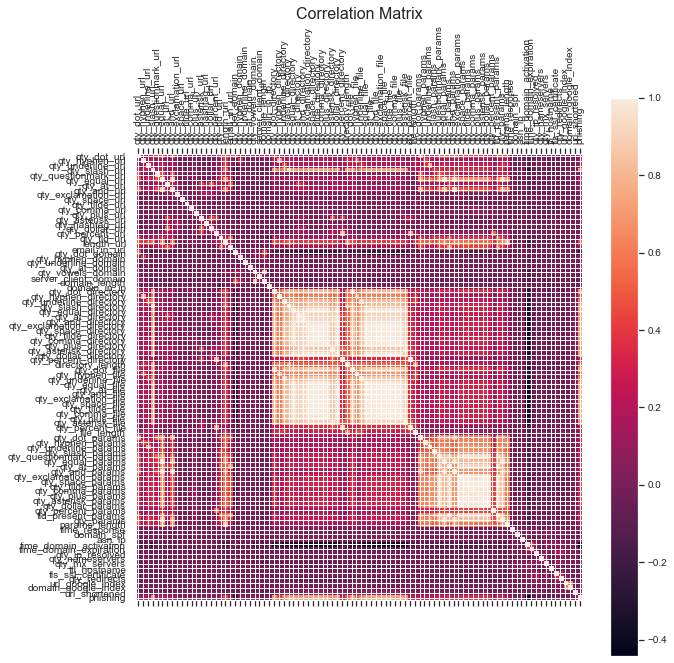

In [371]:
corr_matrix(df_new)

In [372]:
df_new.to_csv(r"c:\Users\magni\Documents\Classes\MIS581 Capstone\data\dataset_full_preprocessed.csv", index=False)